<a href="https://colab.research.google.com/github/Gibsdevops/machine-learning-with-deep-learning-/blob/main/EEG_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne


In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
csv_file_path = '/content/drive/MyDrive/archive/EEG_data.csv'  # Update path accordingly

try:
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    print(f"Successfully loaded {csv_file_path}")

except FileNotFoundError:
    print(f"Error: The file was not found at {csv_file_path}. Please double-check the file path and ensure Drive is mounted correctly.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded /content/drive/MyDrive/archive/EEG_data.csv


In [ ]:
df.head()

,video_id,subject_id,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,...,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood
0,0,0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,...,1.583895,0.504567,0.471979,0.138717,1.801014,1.504794,0.258570,0.435745,0.469483,0
1,0,0,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,...,1.709560,0.606587,0.527616,0.155580,1.859177,1.379617,0.317579,0.468416,0.642560,0
2,0,0,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,...,1.873591,0.795834,0.565414,0.170816,2.027946,1.283876,0.441925,0.494701,0.798197,0
3,0,0,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,...,2.110017,1.021118,0.579656,0.180056,2.265952,1.306188,0.616881,0.506062,0.886495,0
4,0,0,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,...,2.462552,1.230984,0.573620,0.181081,2.461205,1.522420,0.822598,0.498361,0.874455,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68831 entries, 0 to 68830
Data columns (total 87 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   video_id            68831 non-null  int64  
 1   subject_id          68831 non-null  int64  
 2   EEG.AF3             68831 non-null  float64
 3   EEG.F7              68831 non-null  float64
 4   EEG.F3              68831 non-null  float64
 5   EEG.FC5             68831 non-null  float64
 6   EEG.T7              68831 non-null  float64
 7   EEG.P7              68831 non-null  float64
 8   EEG.O1              68831 non-null  float64
 9   EEG.O2              68831 non-null  float64
 10  EEG.P8              68831 non-null  float64
 11  EEG.T8              68831 non-null  float64
 12  EEG.FC6             68831 non-null  float64
 13  EEG.F4              68831 non-null  float64
 14  EEG.F8              68831 non-null  float64
 15  EEG.AF4             68831 non-null  float64
 16  POW.

In [ ]:
df['subject_understood'].nunique()

2

In [ ]:
df.describe()

,video_id,subject_id,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,...,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood
count,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,...,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000
mean,5.624297,3.710828,4276.496212,4257.994590,4302.803482,4292.027479,4302.093465,4243.397476,4231.846947,4240.153361,...,5.386578,2.847343,1.356892,0.770303,22.591861,8.133554,3.861532,1.520038,0.697575,0.789906
std,2.215993,1.828410,115.584631,140.884855,113.720961,135.578849,117.727171,118.189886,115.590762,137.366806,...,42.886793,36.480798,17.930204,8.991064,150.716768,51.722390,35.243356,13.153730,3.937423,0.407378
min,0.000000,0.000000,1030.769287,805.384644,1320.769287,806.538452,1904.487183,1710.769287,1794.871826,1466.538452,...,0.051299,0.036999,0.062924,0.043833,0.195020,0.077566,0.041230,0.056951,0.035907,0.000000
25%,5.000000,3.000000,4258.461426,4236.410156,4283.205078,4273.077148,4282.436035,4220.769043,4211.602539,4218.205078,...,1.093447,0.619023,0.340121,0.166746,1.840644,0.997642,0.511406,0.284404,0.139540,1.000000
50%,6.000000,4.000000,4287.307617,4266.538574,4305.897461,4297.436035,4312.179688,4253.846191,4244.487305,4252.948730,...,1.921246,1.032671,0.612935,0.366483,3.317688,1.679386,0.833078,0.472978,0.262676,1.000000
75%,6.000000,4.000000,4311.153809,4296.153809,4327.692383,4322.563965,4342.179688,4282.820313,4271.794922,4279.615234,...,3.587066,1.850553,1.076909,0.708885,7.129672,3.035433,1.464920,0.837565,0.516598,1.000000
max,10.000000,7.000000,6238.077148,7599.615234,6291.794922,7600.128418,7599.615234,6695.641113,7525.128418,7611.025879,...,3825.365967,3803.180664,2010.126343,966.228027,8159.436035,3092.790283,3372.114746,1347.074341,331.578979,1.000000


In [ ]:
target_variable = 'subject_understood'

feature_columns = [col for col in df.columns if col not in ['video_id', 'subject_id', target_variable]]

In [ ]:
df_for_corr = df[feature_columns + [target_variable]]

In [ ]:
correlation_matrix = df_for_corr.corr()
correlation_with_subject_understood = correlation_matrix[target_variable].sort_values(ascending=False)

In [ ]:
print(f"Correlation of Features with '{target_variable}' (sorted by absolute value, descending):")
print(correlation_with_subject_understood)

# You might also want to view only the top N correlations for clarity
# For example, top 20
print("\nTop 20 Features by Absolute Correlation with Comprehension:")
print(correlation_with_subject_understood.abs().sort_values(ascending=False).head(20))

Correlation of Features with 'subject_understood' (sorted by absolute value, descending):
subject_understood    1.000000
EEG.T8                0.213057
EEG.O1                0.192482
EEG.P8                0.181317
EEG.P7                0.179932
                        ...   
POW.F3.Theta         -0.108740
POW.P8.Theta         -0.109459
POW.T7.Theta         -0.113628
POW.F8.Theta         -0.122997
POW.F7.Theta         -0.129329
Name: subject_understood, Length: 85, dtype: float64

Top 20 Features by Absolute Correlation with Comprehension:
subject_understood    1.000000
EEG.T8                0.213057
EEG.O1                0.192482
EEG.P8                0.181317
EEG.P7                0.179932
EEG.T7                0.167034
EEG.O2                0.157495
EEG.AF3               0.139518
POW.F7.Theta          0.129329
EEG.F7                0.127828
POW.F8.Theta          0.122997
POW.T7.Theta          0.113628
POW.P8.Theta          0.109459
POW.F3.Theta          0.108740
POW.F8.Alpha         

In [ ]:
top_n_features = correlation_with_subject_understood.index[1:16].tolist()

print(f"Selected {len(top_n_features)} top correlated features for scatter matrix:")
print(top_n_features)

Selected 15 top correlated features for scatter matrix:
['EEG.T8', 'EEG.O1', 'EEG.P8', 'EEG.P7', 'EEG.T7', 'EEG.O2', 'EEG.AF3', 'EEG.F7', 'EEG.FC5', 'EEG.F4', 'EEG.F3', 'POW.P7.Gamma', 'POW.P8.Gamma', 'POW.AF4.Alpha', 'EEG.F8']


In [ ]:
#features to plot
features_to_plot = top_n_features + [target_variable]
df_subset = df[features_to_plot]

print("\nFirst 5 rows of the selected subset:")
df_subset.head()


First 5 rows of the selected subset:


,EEG.T8,EEG.O1,EEG.P8,EEG.P7,EEG.T7,EEG.O2,EEG.AF3,EEG.F7,EEG.FC5,EEG.F4,EEG.F3,POW.P7.Gamma,POW.P8.Gamma,POW.AF4.Alpha,EEG.F8,subject_understood
0,4157.179688,4135.897461,4155.384766,4165.000000,4207.948730,4170.000000,4210.641113,4179.102539,4235.384766,4388.846191,4287.948730,0.099637,0.188206,1.504794,4413.461426,0
1,4157.820313,4130.128418,4149.487305,4152.436035,4209.615234,4149.487305,4201.025879,4188.717773,4236.922852,4376.666504,4280.128418,0.110549,0.192056,1.379617,4392.820313,0
2,4131.666504,4131.538574,4131.666504,4172.436035,4207.820313,4147.948730,4203.205078,4182.820313,4231.025879,4377.051270,4282.820313,0.118272,0.193345,1.283876,4390.512695,0
3,4134.230957,4128.333496,4136.666504,4155.384766,4202.179688,4151.666504,4186.538574,4168.717773,4229.230957,4362.436035,4266.794922,0.121525,0.192185,1.306188,4380.897461,0
4,4154.487305,4155.897461,4143.461426,4166.538574,4217.436035,4162.820313,4232.436035,4216.922852,4270.769043,4403.333496,4306.922852,0.120589,0.188342,1.522420,4410.641113,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_subset_scaled_features = scaler.fit_transform(df_subset[top_n_features])

# Create a new DataFrame with scaled features and add the target variable back
df_subset_scaled = pd.DataFrame(df_subset_scaled_features, columns=top_n_features)
df_subset_scaled[target_variable] = df_subset[target_variable].values

print("\nFirst 5 rows of the scaled subset (features only scaled):")
df_subset_scaled.head()


First 5 rows of the scaled subset (features only scaled):


,EEG.T8,EEG.O1,EEG.P8,EEG.P7,EEG.T7,EEG.O2,EEG.AF3,EEG.F7,EEG.FC5,EEG.F4,EEG.F3,POW.P7.Gamma,POW.P8.Gamma,POW.AF4.Alpha,EEG.F8,subject_understood
0,-0.624070,-0.830085,-0.602802,-0.663323,-0.799692,-0.510705,-0.569761,-0.559979,-0.417787,-0.044073,-0.130626,-0.107961,-0.107851,-0.128161,0.281939,0
1,-0.618370,-0.879995,-0.651145,-0.769627,-0.785536,-0.660034,-0.652949,-0.491730,-0.406443,-0.138986,-0.199394,-0.106247,-0.107263,-0.130581,0.141396,0
2,-0.851045,-0.867795,-0.797227,-0.600406,-0.800782,-0.671234,-0.634095,-0.533591,-0.449938,-0.135987,-0.175722,-0.105033,-0.107066,-0.132433,0.125683,0
3,-0.828230,-0.895523,-0.756241,-0.744678,-0.848695,-0.644169,-0.778289,-0.633691,-0.463177,-0.249879,-0.316642,-0.104522,-0.107243,-0.132001,0.060214,0
4,-0.648022,-0.657060,-0.700541,-0.650305,-0.719104,-0.562972,-0.381197,-0.291529,-0.156799,0.068821,0.036224,-0.104669,-0.107831,-0.127820,0.262736,0


In [ ]:
from pandas.plotting import scatter_matrix

fig_size = (20, 20)
plt.figure(figsize=fig_size)


scatter_matrix(df_subset_scaled, figsize=fig_size, diagonal='hist')

plt.suptitle(f'Scatter Matrix of Top {len(top_n_features)} Correlated Features with {target_variable}', y=1.02) # Add a title above the subplots
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Save the plot
plot_filename = 'scatter_matrix_top_features.png'
plt.savefig(plot_filename)
plt.close()

print(f"\nScatter matrix saved to {plot_filename}")


Scatter matrix saved to scatter_matrix_top_features.png


<Figure size 2000x2000 with 0 Axes>

In [ ]:
X_features = [col for col in df.columns if col.startswith('POW.')]

X = df[X_features]

y = df['subject_understood']

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.2

random_state = 42

#split the data

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=test_size,
    random_state=random_state,
    stratify=y
    )
print(f"Original X shape: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



Original X shape: (68831, 70)
X_train shape: (55064, 70)
X_test shape: (13767, 70)
y_train shape: (55064,)
y_test shape: (13767,)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

#back to dataframes
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled_df.head()

,POW.AF3.Theta,POW.AF3.Alpha,POW.AF3.BetaL,POW.AF3.BetaH,POW.AF3.Gamma,POW.F7.Theta,POW.F7.Alpha,POW.F7.BetaL,POW.F7.BetaH,POW.F7.Gamma,...,POW.F8.Theta,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma
0,-0.078425,-0.070909,-0.054434,-0.054202,-0.100458,-0.110248,-0.083533,-0.066117,-0.065986,-0.111129,...,-0.110767,-0.084054,-0.056352,-0.058349,-0.076977,-0.125013,-0.133093,-0.087303,-0.096021,-0.146138
1,0.067175,0.074527,-0.025515,-0.003342,-0.014893,0.219853,0.223577,-0.020003,-0.046419,-0.020102,...,0.062554,0.053158,0.006784,-0.003743,0.042594,0.005696,-0.056028,-0.049662,-0.050979,-0.032057
2,-0.073191,-0.077045,-0.046219,-0.052206,-0.083795,-0.118614,-0.076463,-0.059195,-0.066274,-0.100885,...,-0.106965,-0.066526,-0.054336,-0.045731,-0.067138,-0.128937,-0.118566,-0.080685,-0.088034,-0.118617
3,-0.067138,0.027227,-0.036538,-0.009514,0.077086,-0.113160,-0.013681,-0.036377,0.028162,0.190836,...,-0.109714,-0.098483,-0.054383,-0.031000,0.014399,-0.122554,-0.104680,-0.082529,-0.062229,0.032753
4,-0.017554,0.009692,0.017844,-0.026815,-0.041229,-0.070778,-0.059498,0.002023,-0.039714,-0.007836,...,-0.098206,-0.054231,-0.027548,-0.032773,-0.046193,-0.113756,-0.112319,-0.077583,-0.068650,-0.112705


In [ ]:
X_test_scaled_df.head()

,POW.AF3.Theta,POW.AF3.Alpha,POW.AF3.BetaL,POW.AF3.BetaH,POW.AF3.Gamma,POW.F7.Theta,POW.F7.Alpha,POW.F7.BetaL,POW.F7.BetaH,POW.F7.Gamma,...,POW.F8.Theta,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma
0,-0.094787,-0.092953,-0.058646,-0.047709,-0.051663,-0.124028,-0.061525,-0.049020,-0.034673,0.080300,...,-0.051887,-0.021779,-0.027490,-0.014879,0.013893,-0.141298,-0.131691,-0.088426,-0.071703,-0.081959
1,-0.006029,0.135381,0.149624,0.056229,0.046366,0.020153,0.152669,0.132211,0.035120,0.020799,...,-0.056145,0.046791,0.111449,0.039609,0.046637,-0.009608,-0.068560,0.067538,0.014025,0.005231
2,-0.087999,-0.080309,-0.043888,-0.043974,-0.106123,-0.112547,-0.086837,-0.037988,-0.046699,-0.107216,...,-0.118018,-0.105421,-0.060411,-0.058017,-0.084853,-0.139591,-0.131758,-0.085527,-0.083911,-0.148753
3,0.268990,0.374751,0.154524,0.363207,1.304170,-0.015740,0.198650,0.092648,0.112473,0.248598,...,-0.080552,-0.091528,-0.015927,-0.026095,0.080021,-0.070911,0.094504,0.068962,0.402455,3.538615
4,-0.027358,-0.065030,-0.051903,-0.031563,-0.028489,-0.061741,-0.068641,-0.035658,-0.012739,0.010930,...,-0.088829,-0.049602,-0.052250,-0.030786,-0.021660,-0.112737,-0.101083,-0.092976,-0.083344,-0.088086


In [ ]:
validation_size = 0.2
random_state = 42

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled_df, y_train,
    test_size=validation_size,
    random_state=random_state,
    stratify=y_train
)

print(f"Original X_train_scaled_df shape: {X_train_scaled_df.shape}")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"y_train_final shape: {y_train_final.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

#print("\nFirst 5 rows of X_train_final:")
#print(X_train_final.head())
#print("\nFirst 5 rows of X_val:")
#print(X_val.head())

Original X_train_scaled_df shape: (55064, 70)
X_train_final shape: (44051, 70)
y_train_final shape: (44051,)
X_val shape: (11013, 70)
y_val shape: (11013,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


svm_model = SVC(kernel='rbf', random_state=42)

print("Training SVM model...\n")
svm_model.fit(X_train_final, y_train_final)
print("\nSVM Model Training Complete!")


Training SVM model...


SVM Model Training Complete!


In [ ]:
y_train_pred = svm_model.predict(X_train_final)

print("Accuracy on Training Set:", accuracy_score(y_train_final, y_train_pred))
print("\nClassification Report on Training Set:\n", classification_report(y_train_final, y_train_pred))
print("\nConfusion Matrix on Training Set:\n", confusion_matrix(y_train_final, y_train_pred))

Accuracy on Training Set: 0.8902408571882591

Classification Report on Training Set:
               precision    recall  f1-score   support

           0       0.93      0.52      0.66      9255
           1       0.89      0.99      0.93     34796

    accuracy                           0.89     44051
   macro avg       0.91      0.75      0.80     44051
weighted avg       0.89      0.89      0.88     44051


Confusion Matrix on Training Set:
 [[ 4789  4466]
 [  369 34427]]


In [ ]:
from sklearn.model_selection import cross_val_score

svm_model_cv = SVC(kernel='rbf', random_state=42)

cv_scores = cross_val_score(
    svm_model_cv,
    X_train_final,
    y_train_final,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)

In [ ]:
print("\nCross-Validation Scores (Accuracy) for each fold:")
print(cv_scores)

print(f"\nMean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.4f}")

cv_f1_scores = cross_val_score(svm_model_cv, X_train_final, y_train_final, cv=5, scoring='f1', n_jobs=-1)
print(f"\nMean CV F1-Score: {np.mean(cv_f1_scores):.4f}")


Cross-Validation Scores (Accuracy) for each fold:
[0.88695948 0.88842225 0.88297389 0.88626561 0.89001135]

Mean CV Accuracy: 0.8869
Standard Deviation of CV Accuracy: 0.0024

Mean CV F1-Score: 0.9326


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'] # Sticking to 'rbf' as it's a good general-purpose kernel and what we've used
}

print("Starting GridSearchCV for Hyperparameter Tuning...")
grid_search_model = GridSearchCV(
    SVC(random_state=42), # Pass a new SVC instance to be trained for each combination
    param_grid,
    cv=5,
    scoring='accuracy', # You can also use 'f1' for a balanced metric
    n_jobs=-1,
    verbose=2 # Shows progress of the search
)

grid_search_model.fit(X_train_final, y_train_final)
print("GridSearchCV Complete!")

Starting GridSearchCV for Hyperparameter Tuning...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
GridSearchCV Complete!


In [ ]:
# 4. Get the best parameters and best score
print("\nBest Parameters found by GridSearchCV:", grid_search_model.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_model.best_score_)


Best Parameters found by GridSearchCV: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.975687232358788


In [ ]:
# 5. Get the best model
best_svm_model = grid_search_model.best_estimator_
print("\nBest SVM Model obtained from GridSearchCV:")
print(best_svm_model)


Best SVM Model obtained from GridSearchCV:
SVC(C=100, gamma=1, random_state=42)


In [ ]:
print("\n--- Evaluating Best Model on Validation Set ---")
y_val_pred_best = best_svm_model.predict(X_val)

print("Accuracy on Validation Set (Best Model):", accuracy_score(y_val, y_val_pred_best))
print("\nClassification Report on Validation Set (Best Model):\n", classification_report(y_val, y_val_pred_best))
print("\nConfusion Matrix on Validation Set (Best Model):\n", confusion_matrix(y_val, y_val_pred_best))


--- Evaluating Best Model on Validation Set ---
Accuracy on Validation Set (Best Model): 0.9764823390538454

Classification Report on Validation Set (Best Model):
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2314
           1       0.98      0.99      0.99      8699

    accuracy                           0.98     11013
   macro avg       0.97      0.96      0.96     11013
weighted avg       0.98      0.98      0.98     11013


Confusion Matrix on Validation Set (Best Model):
 [[2139  175]
 [  84 8615]]


In [ ]:
print("\n--- Final Evaluation on TEST Set (Best Model) ---")

# Make predictions on the test set
y_test_pred = best_svm_model.predict(X_test_scaled_df)

# Evaluate the model's performance on the test set
print("Accuracy on Test Set (Best Model):", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Set (Best Model):\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix on Test Set (Best Model):\n", confusion_matrix(y_test, y_test_pred))


--- Final Evaluation on TEST Set (Best Model) ---
Accuracy on Test Set (Best Model): 0.9786445848768794

Classification Report on Test Set (Best Model):
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      2892
           1       0.98      0.99      0.99     10875

    accuracy                           0.98     13767
   macro avg       0.98      0.96      0.97     13767
weighted avg       0.98      0.98      0.98     13767


Confusion Matrix on Test Set (Best Model):
 [[ 2684   208]
 [   86 10789]]


# **using neural networks **

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer # To handle potential one-hot encoding if needed


input_dim = X_train_final.shape[1]

model = Sequential([
    # Input Layer + First Hidden Layer
    # 'Dense' means all neurons in this layer are connected to all neurons in the previous layer.
    # 128 neurons is an arbitrary choice; you can tune this.
    # 'relu' is a common activation function.
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3), # Dropout helps prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.

    # Second Hidden Layer
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output Layer
    # For binary classification, one neuron with 'sigmoid' activation is standard.
    # Sigmoid outputs a probability between 0 and 1.
    Dense(1, activation='sigmoid')
])

# --- 2. Compile the Model ---
# Compile configures the model for training.
# 'optimizer': How the model's weights are updated (e.g., Adam is a popular choice).
# 'loss': The objective function to minimize (binary_crossentropy for binary classification).
# 'metrics': What to monitor during training (e.g., accuracy).
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary() # Print a summary of the model's layers and parameters

# --- 3. Train the Model ---
# 'epochs': Number of times to iterate over the entire training dataset.
# 'batch_size': Number of samples per gradient update.
# 'validation_data': Data on which to evaluate the loss and any model metrics at the end of each epoch.
print("\nTraining Deep Neural Network...")
history = model.fit(X_train_final, y_train_final,
                    epochs=50, # You can adjust this; more epochs might lead to overfitting, less to underfitting
                    batch_size=32, # Common batch size
                    validation_data=(X_val, y_val),
                    verbose=1) # Show training progress



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         9,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,409 (68.00 KB)

 Trainable params: 17,409 (68.00 KB)

 Non-trainable params: 0 (0.00 B)


Training Deep Neural Network...
Epoch 1/50
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8689 - loss: 0.3498 - val_accuracy: 0.9269 - val_loss: 0.1989
Epoch 2/50
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9286 - loss: 0.1856 - val_accuracy: 0.9396 - val_loss: 0.1457
Epoch 3/50
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9424 - loss: 0.1463 - val_accuracy: 0.9530 - val_loss: 0.1176
Epoch 4/50
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9534 - loss: 0.1174 - val_accuracy: 0.9592 - val_loss: 0.0997
Epoch 5/50
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9556 - loss: 0.1042 - val_accuracy: 0.9592 - val_loss: 0.0959
Epoch 6/50
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9595 - loss: 0.0975 - val_accuracy: 0.9682 - val_loss: 0.0751
Epoch 7/50
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9635 - loss: 0.0886 - val_accuracy: 0.9666 - val_loss: 0.0774
Epoch 8/50
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/ste

In [ ]:
print("\nDeep Neural Network Training Complete!")

# --- 4. Evaluate the Model on the Test Set ---
print("\n--- Final Evaluation of Deep Neural Network on TEST Set ---")
loss, accuracy = model.evaluate(X_test_scaled_df, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")




Deep Neural Network Training Complete!

--- Final Evaluation of Deep Neural Network on TEST Set ---
Test Accuracy: 0.9914
Test Loss: 0.0233


In [ ]:
# Get detailed classification report and confusion matrix
y_test_pred_proba = model.predict(X_test_scaled_df)
y_test_pred = (y_test_pred_proba > 0.5).astype(int) # Convert probabilities to binary predictions (0 or 1)

print("\nClassification Report on Test Set (DNN):\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix on Test Set (DNN):\n", confusion_matrix(y_test, y_test_pred))



431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Classification Report on Test Set (DNN):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2892
           1       1.00      0.99      0.99     10875

    accuracy                           0.99     13767
   macro avg       0.98      0.99      0.99     13767
weighted avg       0.99      0.99      0.99     13767


Confusion Matrix on Test Set (DNN):
 [[ 2857    35]
 [   84 10791]]


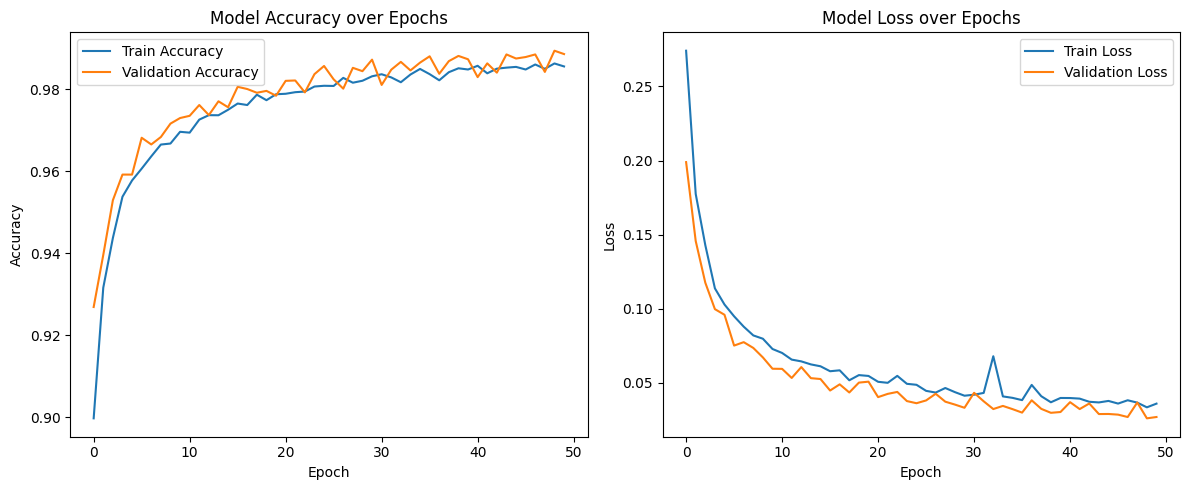

In [ ]:
# Optional: Plot training history (accuracy and loss over epochs)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()